In [19]:
############################################################################
# four state example
# X1[t+ dell] = X1[t] + c1*X2[t]*x3[t] - c2*X1[t] - c3*X3[t]*X1[t]
# X2[t+dell] = X2[t] + c3*X3[t]*x1[t] - c4*X2[t] - c1*X2[t]*X3[t]
# X3[t+dell] = X3[t] - c1*X2[t]*x3[t] - c6*X3[t] - c3*X3[t]*X1[t]
# X4[t+dell] = X4[t] - c7*X1[t]*x4[t] + c8*X4[t] - c9*X4[t]
############################################################################

import numpy as np
import matplotlib.pyplot as plt
import pickle

############################################################################
# calculation of time series data point

#system parameters
c1 = 0.19
c2 = 0.90
c3 = 0.69

c4 = 0.27

c6 = 0.25

c7 = 0.08
c8 = 0.02
c9 = 0.08


#number of states
d = 4

#time series
t = np.linspace(0.0, 0.1, num = 50)

# discrete time
n = range(len(t))

# initialize state vector
X = np.zeros((d, len(t)))


# initial condition
X_0 = [np.ones((d,1))*1.5]

for k in range(len(X_0)):
    #initial condition
    X[:,0] = X_0[k].squeeze()
    #X[0][0] = X_0[k]
    #X[1][0] = X_0[k]
    #X[2][0] = X_0[k]
    #X[3][0] = X_0[k]
    for i in range(1, len(t)):
            X[0][i] = X[0][i-1] + c1*X[1][i-1]*X[2][i-1] - c2*X[0][i-1] - c3*X[2][i-1]*X[0][i-1]
            X[1][i] = X[1][i-1] + c3*X[2][i-1]*X[0][i-1] - c4*X[1][i-1] - c1*X[1][i-1]*X[2][i-1]
            X[2][i] = X[2][i-1] - c1*X[1][i-1]*X[2][i-1] - c6*X[2][i-1] - c3*X[2][i-1]*X[0][i-1]
            X[3][i] = X[3][i-1] - c7*X[0][i-1]*X[3][i-1] + c8*X[3][i-1] - c9*X[3][i-1]
    
    
X = X.T;

In [21]:


Xp = X[0:-1,:];
Xf = X[1:,:];

print Xf.shape

(49, 4)


States:
[[1.5]
 [1.5]
 [1.5]
 [1.5]]


/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


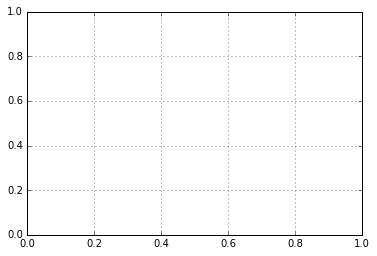

In [22]:

pickle.dump([Xp,Xf], open( "../deepDMD/koopman_data/fourstate_mak.pickle", "wb" ) )
print('States:')
print(X_0[k])
#plt.plot(n,X[0],linestyle='dashed', marker='o',label='X1')
#plt.plot(n,X[1],linestyle='dashed', marker='o',label='X2')
#plt.plot(n,X[2],linestyle='dashed', marker='o',label='X3')
#plt.plot(n,X[3],linestyle='dashed', marker='o',label='X4')
plt.legend()
plt.grid()
plt.show()